# Importations et définition de l'input
-------------------------------------------------------

Une seule couche de convolution sans pooling et sans activation juste le modele qui va permettre de prendre en input une image 5*5*3 (Matrice / tenseur numérrique) et lui appliquer 2 filtre de taille 3*3*3 avec un stride =2 et padding=1

## Introduction aux CNN (Convolutional Neural Networks)

Ce notebook explore les **concepts fondamentaux des réseaux de neurones convolutifs** à travers une implémentation minimale.

**Objectifs pédagogiques** :
- Comprendre l'opération de convolution sur une image
- Visualiser l'effet des filtres convolutifs (feature maps)
- Observer l'impact du stride et du padding
- Découvrir l'opération de pooling (réduction dimensionnelle)

**Configuration de l'expérience** :
- Input : Image 5×5×3 (RGB)
- Filtres : 2 filtres de taille 3×3×3
- Stride : 2 (déplacement de 2 pixels)
- Padding : 1 (same padding)

Image d'entrée shape: (1, 5, 5, 3)
Image d'entrée (premier canal):
[[0.3616539  0.30334622 0.10268542 0.67478627 0.5505765 ]
 [0.6898289  0.9805694  0.47283414 0.05728822 0.7556251 ]
 [0.03148518 0.16984737 0.63685304 0.22704294 0.41971087]
 [0.42538136 0.4263908  0.9225326  0.35717198 0.7905773 ]
 [0.5866797  0.48347    0.7670328  0.06117418 0.3050228 ]]


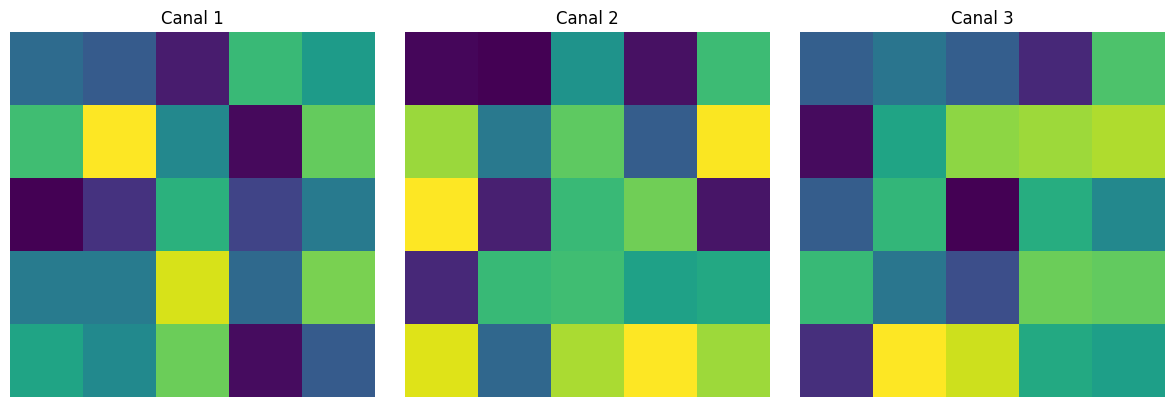

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Création d'une image d'entrée 5x5x3 (valeurs aléatoires pour l'exemple)
input_image = np.random.rand(1, 5, 5, 3).astype(np.float32)  # Shape: (batch, height, width, channels)

print("Image d'entrée shape:", input_image.shape)
print("Image d'entrée (premier canal):")
print(input_image[0, :, :, 0])

# Affichage des trois canaux
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(input_image[0, :, :, i], cmap='viridis')
    axes[i].set_title(f'Canal {i+1}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

### Génération de l'image d'entrée
Création d'une image 5×5 avec 3 canaux (RGB) remplie de valeurs aléatoires. Chaque canal est affiché séparément pour comprendre la structure tensorielle.

### Construction du modèle CNN
-------------------------------

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Construction du modèle séquentiel
model = Sequential(name='simple_cnn_sequential')

# Ajout de la couche de convolution
model.add(Conv2D(
    filters=2,                    # 2 filtres
    kernel_size=(3, 3),           # Taille 3x3
    strides=(2, 2),               # Stride = 2 dans les deux directions
    padding='same',               # Padding = 1 (pour conserver la dimension)
    use_bias=True,                # Avec biais cette fois
    activation=None,              # Pas de fonction d'activation
    input_shape=(5, 5, 3),        # Shape de l'input
    name='conv_layer'
))

# Affichage de l'architecture
model.summary()

# Affichage des poids des filtres et des biais
print("\n=== INFORMATIONS SUR LES POIDS ===")
print("Poids des filtres (shape):", model.layers[0].get_weights()[0].shape)
print("Biais (shape):", model.layers[0].get_weights()[1].shape)

print("\nPoids du premier filtre (3x3x3):")
print(model.layers[0].get_weights()[0][:, :, :, 0])

print("\nPoids du deuxième filtre (3x3x3):")
print(model.layers[0].get_weights()[0][:, :, :, 1])

print("\nValeurs des biais pour les 2 filtres:")
print(model.layers[0].get_weights()[1])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "simple_cnn_sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_layer (Conv2D)             │ (None, 3, 3, 2)        │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)


=== INFORMATIONS SUR LES POIDS ===
Poids des filtres (shape): (3, 3, 3, 2)
Biais (shape): (2,)

Poids du premier filtre (3x3x3):
[[[ 0.04609278  0.34032017 -0.24943623]
  [-0.14515929  0.2854762   0.08351576]
  [-0.00583786  0.36238533  0.3424639 ]]

 [[-0.055307   -0.20930322 -0.13994467]
  [-0.334896    0.04804391 -0.12127149]
  [ 0.13570619 -0.2873255   0.31406212]]

 [[ 0.26664478  0.02729481 -0.05102226]
  [-0.19860768 -0.22021098 -0.21509789]
  [-0.29871255 -0.19022407  0.0191856 ]]]

Poids du deuxième filtre (3x3x3):
[[[ 0.22466129  0.136733   -0.0405294 ]
  [ 0.28688842 -0.2961768  -0.11229753]
  [-0.23147553  0.30064595 -0.17630355]]

 [[-0.3254078  -0.13209586 -0.11819154]
  [-0.29697382  0.06641275 -0.05313918]
  [ 0.05585137 -0.31400022 -0.05083072]]

 [[-0.2633551  -0.33556837 -0.05321822]
  [ 0.33634996  0.06774455 -0.25459242]
  [-0.29483593 -0.07694155  0.12508333]]]

Valeurs des biais pour les 2 filtres:
[0. 0.]


### Architecture du modèle convolutif

**Paramètres clés** :
- **filters=2** : On applique 2 filtres différents → 2 feature maps en sortie
- **kernel_size=(3,3)** : Chaque filtre est une matrice 3×3
- **strides=(2,2)** : Le filtre se déplace de 2 pixels → réduction de dimension
- **padding='same'** : Padding pour maintenir les dimensions (approximativement)
- **activation=None** : Pas de fonction d'activation pour voir les valeurs brutes

**Calcul de la dimension de sortie** :
Avec stride=2 et padding='same' : Output = ⌈Input / Stride⌉ = ⌈5/2⌉ = 3×3

Chaque filtre a **3×3×3 = 27 poids** (pour les 3 canaux d'entrée) + 1 biais.

# Application du modèle et affichage des feature maps
----------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Shape de la sortie: (1, 3, 3, 2)
Feature maps générés:


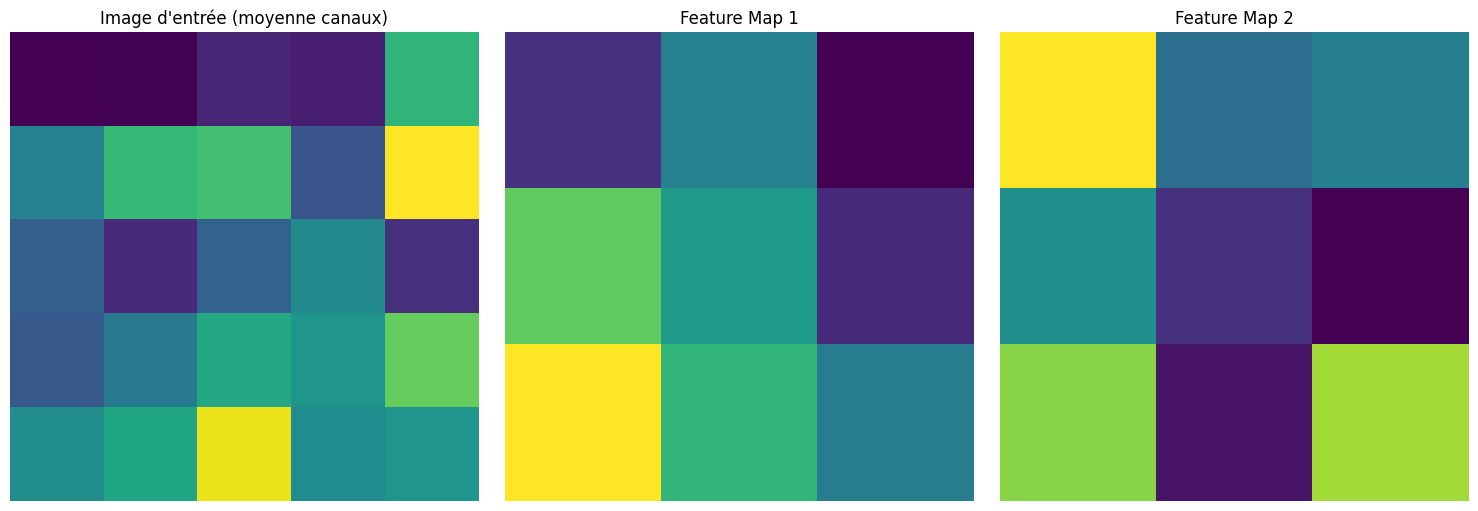


Valeurs numériques du premier feature map:
[[-0.68056655 -0.25817454 -0.87633944]
 [ 0.17271808 -0.12603901 -0.70513654]
 [ 0.5140107   0.04571101 -0.29199946]]

Valeurs numériques du deuxième feature map:
[[-0.10188029 -0.5110178  -0.46644616]
 [-0.42358643 -0.6537333  -0.74426746]
 [-0.21553528 -0.7104923  -0.19105116]]


In [ ]:
# Application du modèle sur l'image d'entrée
output = model.predict(input_image)

print("Shape de la sortie:", output.shape)
print("Feature maps générés:")

# Affichage des deux feature maps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Image d'entrée (moyenne des canaux)
axes[0].imshow(np.mean(input_image[0], axis=2), cmap='viridis')
axes[0].set_title('Image d\'entrée (moyenne canaux)')
axes[0].axis('off')

# Premier feature map
axes[1].imshow(output[0, :, :, 0], cmap='viridis')
axes[1].set_title('Feature Map 1')
axes[1].axis('off')

# Deuxième feature map
axes[2].imshow(output[0, :, :, 1], cmap='viridis')
axes[2].set_title('Feature Map 2')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Affichage des valeurs numériques
print("\nValeurs numériques du premier feature map:")
print(output[0, :, :, 0])

print("\nValeurs numériques du deuxième feature map:")
print(output[0, :, :, 1])

### Visualisation des feature maps

Les **feature maps** représentent les caractéristiques extraites par chaque filtre :
- Feature Map 1 : Résultat de la convolution avec le filtre 1
- Feature Map 2 : Résultat de la convolution avec le filtre 2

Chaque filtre "détecte" des patterns différents dans l'image (bords, textures, etc.). La sortie est 3×3×2 (hauteur × largeur × nombre de filtres).

In [ ]:
# Calcul manuel des dimensions de sortie
def calculate_output_size(input_size, kernel_size, stride, padding):
    if padding == 'same':
        output_size = np.ceil(input_size / stride)
    else:
        output_size = np.floor((input_size - kernel_size) / stride + 1)
    return int(output_size)

input_height, input_width = 5, 5
kernel_size = 3
stride = 2
padding = 'same'  # équivalent à padding=1

output_height = calculate_output_size(input_height, kernel_size, stride, padding)
output_width = calculate_output_size(input_width, kernel_size, stride, padding)

print(f"Dimensions d'entrée: {input_height}x{input_width}x3")
print(f"Dimensions de sortie calculées: {output_height}x{output_width}x2")
print(f"Dimensions de sortie réelles: {output.shape[1]}x{output.shape[2]}x{output.shape[3]}")

Dimensions d'entrée: 5x5x3
Dimensions de sortie calculées: 3x3x2
Dimensions de sortie réelles: 3x3x2


### Vérification du calcul des dimensions

**Formule de calcul** avec padding='same' :
```
output_size = ⌈input_size / stride⌉
```

Pour notre exemple : ⌈5/2⌉ = 3

Cette vérification confirme que la dimension de sortie correspond au calcul théorique.

# Construction du modèle CNN avec MaxPooling
------------------------------------------------

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Construction du modèle séquentiel
model = Sequential(name='simple_cnn_with_pooling')

# Ajout de la couche de convolution
model.add(Conv2D(
    filters=2,                    # 2 filtres
    kernel_size=(3, 3),           # Taille 3x3
    strides=(2, 2),               # Stride = 2 dans les deux directions
    padding='same',               # Padding = 1 (pour conserver la dimension)
    use_bias=True,                # Avec biais cette fois
    activation=None,              # Pas de fonction d'activation
    input_shape=(5, 5, 3),        # Shape de l'input
    name='conv_layer'
))

# Ajout de la couche MaxPooling
model.add(MaxPooling2D(
    pool_size=(3, 3),             # Taille de la fenêtre de pooling
    strides=(1, 1),               # Stride = 1 (déplacement de 1 pixel)
    padding='same',               # Padding pour conserver les dimensions
    name='max_pooling_layer'
))

# Affichage de l'architecture
model.summary()

# Affichage des poids des filtres et des biais
print("\n=== INFORMATIONS SUR LES POIDS ===")
print("Poids des filtres (shape):", model.layers[0].get_weights()[0].shape)
print("Biais (shape):", model.layers[0].get_weights()[1].shape)

print("\nPoids du premier filtre (3x3x3):")
print(model.layers[0].get_weights()[0][:, :, :, 0])

print("\nPoids du deuxième filtre (3x3x3):")
print(model.layers[0].get_weights()[0][:, :, :, 1])

print("\nValeurs des biais pour les 2 filtres:")
print(model.layers[0].get_weights()[1])

Model: "simple_cnn_with_pooling"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_layer (Conv2D)             │ (None, 3, 3, 2)        │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_layer               │ (None, 3, 3, 2)        │             0 │
│ (MaxPooling2D)                  │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56 (224.00 B)

 Trainable params: 56 (224.00 B)

 Non-trainable params: 0 (0.00 B)


=== INFORMATIONS SUR LES POIDS ===
Poids des filtres (shape): (3, 3, 3, 2)
Biais (shape): (2,)

Poids du premier filtre (3x3x3):
[[[ 0.31353533 -0.22007073  0.2016468 ]
  [-0.19672461 -0.13062014 -0.26062766]
  [ 0.36080748 -0.13693151  0.02695328]]

 [[-0.36406648  0.00871965 -0.29113492]
  [-0.34651    -0.07738495  0.07858732]
  [-0.30549186 -0.12162346  0.23715061]]

 [[-0.34019583  0.06921923  0.08711725]
  [ 0.01148635 -0.05489555  0.05532712]
  [-0.13177888  0.0698719   0.15416265]]]

Poids du deuxième filtre (3x3x3):
[[[ 0.17428285 -0.01271024 -0.2656575 ]
  [-0.15159662 -0.14500955 -0.32323343]
  [ 0.131838    0.08907616 -0.1542863 ]]

 [[-0.03660631 -0.26282674  0.11587206]
  [ 0.0449852   0.03942367  0.3141907 ]
  [-0.17116138 -0.18500206  0.03927419]]

 [[-0.339744   -0.22488706 -0.1671332 ]
  [ 0.24360842 -0.17201272 -0.23844916]
  [-0.1490204   0.01623148 -0.29001075]]]

Valeurs des biais pour les 2 filtres:
[0. 0.]


### Ajout du MaxPooling

**MaxPooling** : Opération de sous-échantillonnage qui :
- Prend le **maximum** dans une fenêtre 3×3
- Réduit la dimensionnalité tout en conservant les features importantes
- Apporte une invariance à la translation (robustesse)
- Réduit le nombre de paramètres pour les couches suivantes

**Configuration** :
- pool_size=(3,3) : Fenêtre de 3×3
- strides=(1,1) : Déplacement de 1 pixel (overlap important)
- padding='same' : Conservation des dimensions

# Application du modèle et affichage des résultats avant et après pooling
-----------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
=== COMPARAISON DES SORTIES ===
Shape après convolution seulement: (1, 3, 3, 2)
Shape après convolution + pooling: (1, 3, 3, 2)


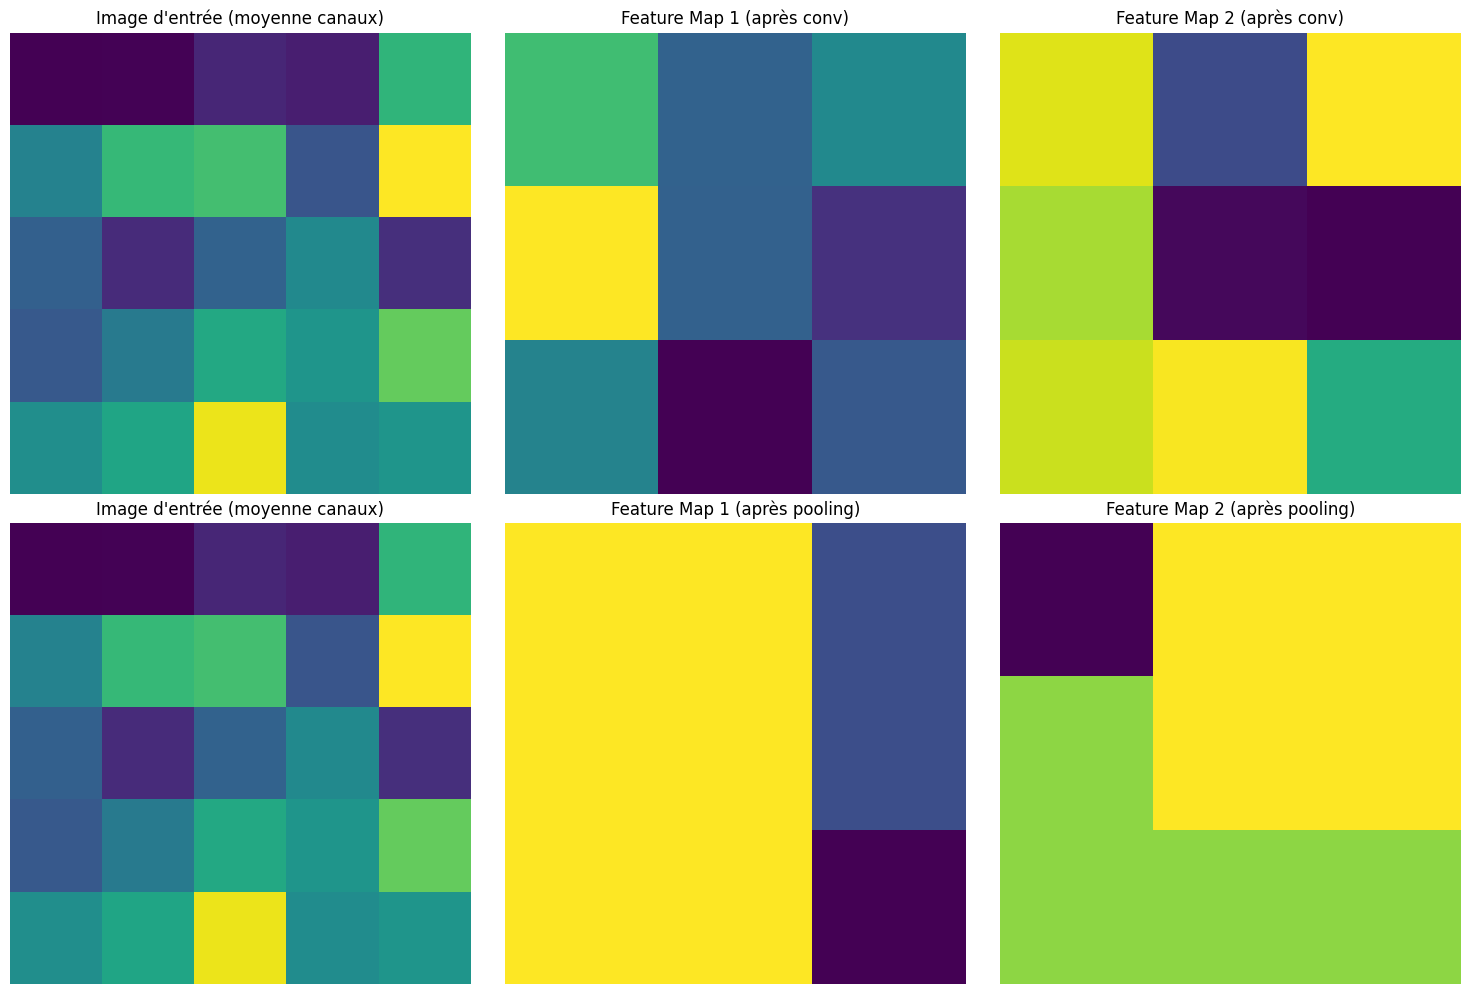


=== VALEURS NUMÉRIQUES ===
Feature Map 1 après convolution:
[[-0.15105605 -0.5581306  -0.38647917]
 [ 0.18077831 -0.5640588  -0.7456842 ]
 [-0.41473964 -0.8994926  -0.59877133]]

Feature Map 1 après max pooling:
[[ 0.18077831  0.18077831 -0.38647917]
 [ 0.18077831  0.18077831 -0.38647917]
 [ 0.18077831  0.18077831 -0.5640588 ]]

Feature Map 2 après convolution:
[[-0.2162443  -0.9511677  -0.16628437]
 [-0.29909763 -1.1593822  -1.1827164 ]
 [-0.24681403 -0.17470542 -0.558305  ]]

Feature Map 2 après max pooling:
[[-0.2162443  -0.16628437 -0.16628437]
 [-0.17470542 -0.16628437 -0.16628437]
 [-0.17470542 -0.17470542 -0.17470542]]


In [ ]:
# Création d'un modèle intermédiaire pour voir la sortie après convolution seulement
model_conv_only = Sequential()
model_conv_only.add(model.layers[0])  # On réutilise la même couche de convolution

# Application des deux modèles
output_conv = model_conv_only.predict(input_image)  # Après convolution seulement
output_pool = model.predict(input_image)           # Après convolution + pooling

print("=== COMPARAISON DES SORTIES ===")
print("Shape après convolution seulement:", output_conv.shape)
print("Shape après convolution + pooling:", output_pool.shape)

# Affichage des résultats
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Ligne 1 : Après convolution seulement
axes[0, 0].imshow(np.mean(input_image[0], axis=2), cmap='viridis')
axes[0, 0].set_title('Image d\'entrée (moyenne canaux)')
axes[0, 0].axis('off')

axes[0, 1].imshow(output_conv[0, :, :, 0], cmap='viridis')
axes[0, 1].set_title('Feature Map 1 (après conv)')
axes[0, 1].axis('off')

axes[0, 2].imshow(output_conv[0, :, :, 1], cmap='viridis')
axes[0, 2].set_title('Feature Map 2 (après conv)')
axes[0, 2].axis('off')

# Ligne 2 : Après pooling
axes[1, 0].imshow(np.mean(input_image[0], axis=2), cmap='viridis')
axes[1, 0].set_title('Image d\'entrée (moyenne canaux)')
axes[1, 0].axis('off')

axes[1, 1].imshow(output_pool[0, :, :, 0], cmap='viridis')
axes[1, 1].set_title('Feature Map 1 (après pooling)')
axes[1, 1].axis('off')

axes[1, 2].imshow(output_pool[0, :, :, 1], cmap='viridis')
axes[1, 2].set_title('Feature Map 2 (après pooling)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Affichage des valeurs numériques
print("\n=== VALEURS NUMÉRIQUES ===")
print("Feature Map 1 après convolution:")
print(output_conv[0, :, :, 0])

print("\nFeature Map 1 après max pooling:")
print(output_pool[0, :, :, 0])

print("\nFeature Map 2 après convolution:")
print(output_conv[0, :, :, 1])

print("\nFeature Map 2 après max pooling:")
print(output_pool[0, :, :, 1])

### Comparaison avant/après pooling

**Effet du MaxPooling** :
- **Ligne 1** : Feature maps après convolution (valeurs brutes)
- **Ligne 2** : Feature maps après max pooling (valeurs lissées)

Le pooling :
1. Conserve les activations maximales (features dominantes)
2. "Lisse" les feature maps en réduisant les détails
3. Crée une représentation plus robuste et compacte

**Observation** : Les valeurs après pooling tendent à être plus élevées (on garde les maxima) et la carte est plus homogène.

## Synthèse des concepts CNN

### Opération de Convolution
```
Entrée (5×5×3) → [Convolution] → Sortie (3×3×2)
                   ↓
        2 filtres 3×3×3 avec stride=2
```

**Apprentissage** : Les poids des filtres sont appris pendant l'entraînement pour détecter automatiquement des patterns pertinents.

### Opération de Pooling
```
Feature Maps (3×3×2) → [MaxPool 3×3] → Pooled Maps (3×3×2)
                           ↓
              Réduction du bruit, robustesse
```

### Points clés

1. **Convolution** = Extraction de features locales
2. **Stride** = Contrôle de la réduction dimensionnelle
3. **Padding** = Gestion des bords de l'image
4. **Pooling** = Sous-échantillonnage et invariance
5. **Nombre de filtres** = Richesse de la représentation

### Architecture CNN typique
```
Input → [Conv → ReLU → Pool] × N → Flatten → Dense → Output
```

Ce notebook a montré les briques élémentaires. Les CNN réels empilent plusieurs de ces couches pour extraire des features de plus en plus abstraites.